['pop-ppr-joint', 'greedy-ppr-kg', 'greedy-ppr-joint-top50', 'greedy-ppr-joint-5hr', 'greedy-ppr-joint-5cov', 'greedy-ppr-joint-10cov', 'greedy-ppr-joint']


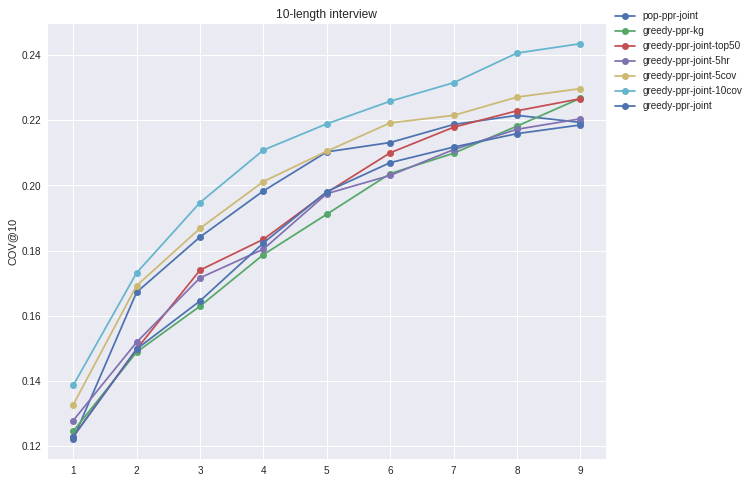

In [52]:
from requests import get
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind, ttest_rel

plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.linewidth'] = 0.8
plt.style.use('seaborn')

metric = 'cov'
cutoff = '10'
n_questions = 10
significance_level = 0.05

#data = get(f'https://mindreader.tech/spectate/results/final_equal_popularity/{metric}/{cutoff}').json()
data = get(f'http://localhost:5000/spectate/results/150k_equal/{metric}/{cutoff}').json()
#
models = sorted([key for key in data.keys() if 'rec' not in key], reverse=True)

print(models)
fig, ax = plt.subplots(figsize=(10, 8))

for model in models:
    x = np.arange(1, 10, 1)
    y = [np.mean(data[model][key- 1]) for key in x]
    
    plt.plot(x, y, label=model, marker='o', linestyle='dashed' if model.endswith('rec') else 'solid')

plt.ylabel(f'{metric.upper()}@{cutoff}')
plt.title(f'{n_questions}-length interview')

plt.legend(bbox_to_anchor=(1, 1.05))
plt.savefig('lineplot.pdf', bbox_inches='tight')
plt.show()